# Business Objective : 
    
1. Most customers - when will they order, what will they order? - This can be formated as when there will be MAX orders and What would be the items ordered?

2. How many customers are going to order a particular menu item and when will they order? - For each item, how many orders might be placed.


# 1. Load Necessary Libraries and the Data

In [2]:
import pandas as pd
import numpy as np
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

data = pd.read_excel("For Testing.xlsx")

##### Print the Loaded data

In [3]:
data.head(10)

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10_10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10_16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10_16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10_17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10_17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1
5,NaN,2019-01-11_13:03:34.0,2.57,pickUp,,NaN,NaN,Credit Card,Confirmed,Canned Soda,0.99,1
6,NaN,2019-01-11_20:09:06.0,3.55,pickUp,,NaN,NaN,Credit Card,Confirmed,Milk,1.89,1
7,NaN,2019-01-13_16:47:15.0,58.43,delivery,,NaN,NaN,Credit Card,Confirmed,the ralphie?s,17.99,1
8,NaN,,,,,NaN,NaN,,,The classic,14.99,1
9,NaN,2019-01-13_18:24:09.0,35.04,delivery,,NaN,NaN,Credit Card,Confirmed,nutty hawaiian salad,5.99,1


In [4]:
#Make a Copy of Original Data
df = data.copy()

# 2. Exploratory Data Analysis and Data Cleaning

In [5]:
#First, replace your empty cells with NaNs and then fill them with the previous row values.

df[df['Created On'] == " "]
df['Created On'].replace(" ",np.NaN,inplace=True)

In [6]:
df['Created On'] = df['Created On'].fillna(method='ffill')

In [7]:
df.head(10)

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10_10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10_16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10_16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10_17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10_17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1
5,NaN,2019-01-11_13:03:34.0,2.57,pickUp,,NaN,NaN,Credit Card,Confirmed,Canned Soda,0.99,1
6,NaN,2019-01-11_20:09:06.0,3.55,pickUp,,NaN,NaN,Credit Card,Confirmed,Milk,1.89,1
7,NaN,2019-01-13_16:47:15.0,58.43,delivery,,NaN,NaN,Credit Card,Confirmed,the ralphie?s,17.99,1
8,NaN,2019-01-13_16:47:15.0,,,,NaN,NaN,,,The classic,14.99,1
9,NaN,2019-01-13_18:24:09.0,35.04,delivery,,NaN,NaN,Credit Card,Confirmed,nutty hawaiian salad,5.99,1


In [8]:
df.columns

Index(['Customer Name', 'Created On', 'Order Total', 'Order Type',
       'Order Notes', ' Customer Email', 'Customer Phone', 'Payment Type',
       'OrderStatus', 'Order Item ', 'Order Item Price', ' Quantity'],
      dtype='object')

In [9]:
df.shape

(1697, 12)

In [10]:
df.describe()

,Customer Name,Customer Phone,Order Item Price,Quantity
count,0.0,0.0,1697.000000,1697.000000
mean,NaN,NaN,8.713742,1.057749
std,NaN,NaN,5.108735,0.266375
min,NaN,NaN,0.990000,1.000000
25%,NaN,NaN,4.990000,1.000000
50%,NaN,NaN,8.990000,1.000000
75%,NaN,NaN,9.990000,1.000000
max,NaN,NaN,27.980000,5.000000


In [11]:
df['Created On'] = df['Created On'].str.replace("_"," ")

In [12]:
df.head()

,Customer Name,Created On,Order Total,Order Type,Order Notes,Customer Email,Customer Phone,Payment Type,OrderStatus,Order Item,Order Item Price,Quantity
0,NaN,2019-01-10 10:27:07.0,9.07,pickUp,,NaN,NaN,Cash,Confirmed,sedona salad,6.99,1
1,NaN,2019-01-10 16:48:23.0,2.57,pickUp,,NaN,NaN,Cash,Confirmed,Canned Soda,0.99,1
2,NaN,2019-01-10 16:52:28.0,2.57,pickUp,,NaN,NaN,Cash,Pending,Canned Soda,0.99,1
3,NaN,2019-01-10 17:00:10.0,4.74,pickUp,,NaN,NaN,Cash,Confirmed,2 Liter Soda,2.99,1
4,NaN,2019-01-10 17:20:27.0,14.79,pickUp,This is a sample order,NaN,NaN,Cash,Confirmed,Cheese Pizza,7.99,1


In [13]:
#Remove Unwanted Columns
df.drop(columns=['Customer Name', 'Order Total', 'Order Type','Order Notes',' Customer Email','Customer Phone','Payment Type','OrderStatus','Order Item Price'],inplace=True)

In [14]:
df.head()

,Created On,Order Item,Quantity
0,2019-01-10 10:27:07.0,sedona salad,1
1,2019-01-10 16:48:23.0,Canned Soda,1
2,2019-01-10 16:52:28.0,Canned Soda,1
3,2019-01-10 17:00:10.0,2 Liter Soda,1
4,2019-01-10 17:20:27.0,Cheese Pizza,1


In [15]:
df.dtypes

Created On     object
Order Item     object
 Quantity       int64
dtype: object

In [16]:
df['Created On'] = pd.to_datetime(df['Created On'])

In [17]:
df.dtypes

Created On     datetime64[ns]
Order Item             object
 Quantity               int64
dtype: object

In [18]:
df['Created On'].min()

Timestamp('2019-01-10 10:27:07')

In [19]:
df['Created On'].max()

Timestamp('2019-09-23 18:19:30')

In [20]:
df = df.sort_values('Created On')

In [21]:
#Check for any missing values
df.isnull().sum()

Created On     0
Order Item     0
 Quantity      0
dtype: int64

In [22]:
df['Order Item '].unique()

array(['sedona salad', 'Canned Soda', '2 Liter Soda', 'Cheese Pizza',
       'Milk', 'the ralphie?s', 'The classic', 'nutty hawaiian salad',
       'cade & blake pesto Calzone', 'greek bread', 'greek salad',
       'greek gyro', 'lasagna', 'Shrimp il palio/alfredo',
       'baked buffalo wings', 'baked mac & cheese', 'Hot Club Sandwich',
       'grace?s alfredo', 'spaghetti', 'Chicken alfredo or blackened',
       'italian Sub', 'tiramisu', 'cannoli', 'the mediterranean',
       'the scorcher', 'pasta arrabiata', 'dinner salad',
       'Chocolate Mousse Cake', 'manicotti', 'chicken parmesan',
       'baked ziti', 'the king', 'new york style plain cheesecake',
       'Kids chicken nuggets', 'kids baked mac & cheese',
       'The classic Calzone', 'Strawberry Cheesecake',
       'mozzarella sticks', 'Tamato Basil Soup', 'palio?s vegetable',
       'caramel turtle cheesecake', 'hawaiian sunrise', 'the Prestino',
       'the mediterranean Calzone', 'cheese bread', 'cade & blake pesto',
   

In [23]:
#Now Cleanse the item column
#It has '?' marks, the word 'Any', 'BUY ANY LARGE CALAZONE','BUY ANY PIZZA','BUY ANY MEDIUM CALAZONE','BUY ANY MEDIUM PIZZA','BUY ANY X-LARGE PIZZA'
df['Order Item '] = df['Order Item '].str.replace(r'?',"")
df['Order Item '] = df['Order Item '].str.replace("Any","")
df['Order Item '] = df['Order Item '].str.replace(r'\(.*?\)','',regex=True)

In [24]:
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY X-LARGE PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY MEDIUM PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY LARGE PIZZA.*$','pizza')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY LARGE CALZONE.*$','calzone')
df['Order Item '] = df['Order Item '].str.replace(r'^BUY ANY MEDIUM CALZONE.*$','calzone')

In [25]:
df['Order Item'] = df['Order Item '].str.lower()
df['Order Item'] = df['Order Item'].str.strip()

In [26]:
df.to_excel("output.xlsx")

In [27]:
df['Order Item'].unique()

array(['sedona salad', 'canned soda', '2 liter soda', 'cheese pizza',
       'milk', 'the ralphies', 'the classic', 'nutty hawaiian salad',
       'cade & blake pesto calzone', 'greek bread', 'greek salad',
       'greek gyro', 'lasagna', 'shrimp il palio/alfredo',
       'baked buffalo wings', 'baked mac & cheese', 'hot club sandwich',
       'graces alfredo', 'spaghetti', 'chicken alfredo or blackened',
       'italian sub', 'tiramisu', 'cannoli', 'the mediterranean',
       'the scorcher', 'pasta arrabiata', 'dinner salad',
       'chocolate mousse cake', 'manicotti', 'chicken parmesan',
       'baked ziti', 'the king', 'new york style plain cheesecake',
       'kids chicken nuggets', 'kids baked mac & cheese',
       'the classic calzone', 'strawberry cheesecake',
       'mozzarella sticks', 'tamato basil soup', 'palios vegetable',
       'caramel turtle cheesecake', 'hawaiian sunrise', 'the prestino',
       'the mediterranean calzone', 'cheese bread', 'cade & blake pesto',
      

In [28]:
df['Order Item'] = df['Order Item'].astype('category')

In [29]:
# Dropping old  columns 
df.drop(columns =["Order Item "], inplace = True) 

In [30]:
df.dtypes

Created On    datetime64[ns]
 Quantity              int64
Order Item          category
dtype: object

In [31]:
df['Ordred month'] = pd.DatetimeIndex(df['Created On']).month
df['Ordered Weekday'] = pd.DatetimeIndex(df['Created On']).dayofweek

In [32]:
df.tail()

,Created On,Quantity,Order Item,Ordred month,Ordered Weekday
1691,2019-09-22 20:03:24,1,spaghetti,9,6
1694,2019-09-23 18:19:30,1,caesar salad,9,0
1695,2019-09-23 18:19:30,2,tamato basil soup,9,0
1693,2019-09-23 18:19:30,1,caesar salad,9,0
1696,2019-09-23 18:19:30,1,soda,9,0


In [33]:
df_ordered = df.groupby('Created On')['Order Item'].count().reset_index()

In [34]:
df_ordered.head()

,Created On,Order Item
0,2019-01-10 10:27:07,1
1,2019-01-10 16:48:23,1
2,2019-01-10 16:52:28,1
3,2019-01-10 17:00:10,1
4,2019-01-10 17:20:27,1


In [35]:
df_ordered = df_ordered.set_index('Created On')
df_ordered.index

DatetimeIndex(['2019-01-10 10:27:07', '2019-01-10 16:48:23',
               '2019-01-10 16:52:28', '2019-01-10 17:00:10',
               '2019-01-10 17:20:27', '2019-01-11 13:03:34',
               '2019-01-11 20:09:06', '2019-01-13 16:47:15',
               '2019-01-13 18:24:09', '2019-01-16 16:33:14',
               ...
               '2019-09-21 19:15:21', '2019-09-21 19:40:23',
               '2019-09-21 19:57:49', '2019-09-22 12:01:41',
               '2019-09-22 16:18:01', '2019-09-22 17:34:41',
               '2019-09-22 18:16:27', '2019-09-22 19:45:50',
               '2019-09-22 20:03:24', '2019-09-23 18:19:30'],
              dtype='datetime64[ns]', name='Created On', length=616, freq=None)

In [36]:
#the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.
y = df_ordered['Order Item'].resample('MS').sum()

In [37]:
y['2019':]

Created On
2019-01-01     89
2019-02-01     64
2019-03-01    140
2019-04-01    263
2019-05-01    206
2019-06-01    306
2019-07-01    170
2019-08-01    248
2019-09-01    211
Freq: MS, Name: Order Item, dtype: int64

### Plot the month wise count of orders 

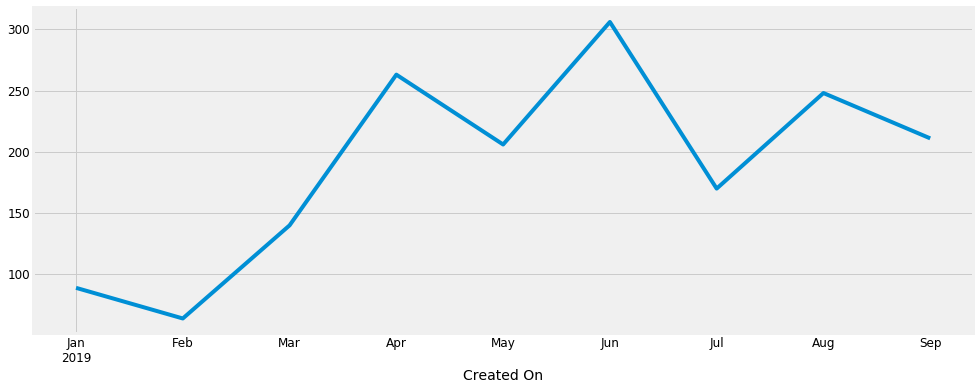

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
y.plot(figsize=(15, 6))
plt.show()

## ANSWER : Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and medium at the end of the year. There is always an upward trend between Feb and Ma aynd between May and Jul is a couple of low months in the mid of the year.

In [39]:
df_ordered.columns

Index(['Order Item'], dtype='object')

In [40]:
week_df = df_ordered.groupby(df_ordered.index.weekday_name).count()
print (week_df.sort_index())

            Order Item
Created On            
Friday             126
Monday              47
Saturday           112
Sunday             119
Thursday            60
Tuesday             69
Wednesday           83


In [41]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = week_df.index.map(mapping)
#print(key)
week_df = week_df.iloc[key.argsort()]
print(week_df)

            Order Item
Created On            
Monday              47
Tuesday             69
Wednesday           83
Thursday            60
Friday             126
Saturday           112
Sunday             119


### Plot the Count of orders by weekday

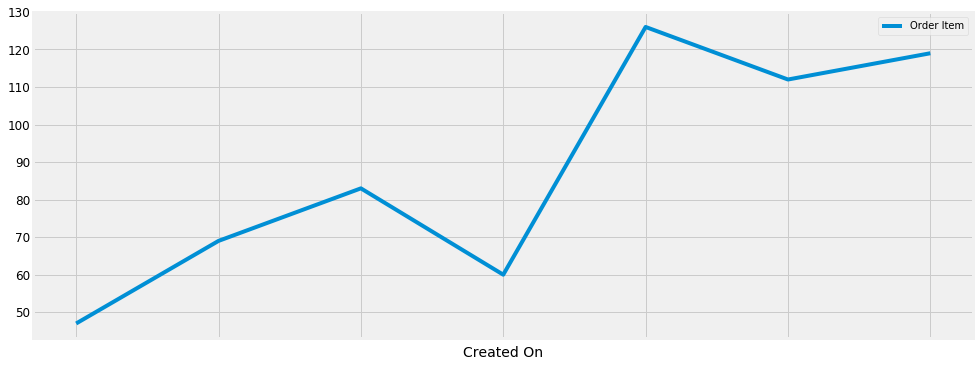

In [42]:
week_df.plot(figsize=(15, 6))
plt.show()


## ANSWER 2 : As expected, during weekends the sales is high and during Mondays and thrusdays is low.

In [43]:
#When they will order and what they will order....
#During month of Mar the sales are expected to rise and also during weekends ( saturday and sunday ) the sale is high.

#What they will order
df.pivot_table(' Quantity', index='Ordred month', columns='Order Item')


Order Item,2 liter soda,artichoke deluxe,baked buffalo wings,baked mac & cheese,baked ziti,beef ravioli,bottled water,cade & blake pesto,cade & blake pesto calzone,caesar salad,...,the classic calzone,the greek,the king,the king calzone,the mediterranean,the mediterranean calzone,the prestino,the ralphies,the scorcher,tiramisu
Ordred month,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.000000
2,NaN,NaN,1.000000,1.0,1.5,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.333333
3,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.142857
4,1.0,1.0,1.333333,1.0,1.0,1.0,NaN,1.0,NaN,1.250000,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.333333
5,1.0,NaN,1.142857,NaN,1.0,NaN,NaN,1.0,NaN,1.125000,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.000000
6,1.0,NaN,1.333333,1.0,1.0,1.0,NaN,NaN,NaN,1.222222,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.076923
7,1.0,NaN,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.000000
8,1.0,NaN,1.166667,1.0,1.0,1.0,NaN,NaN,NaN,1.000000,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.500000
9,1.0,NaN,1.166667,1.0,1.0,1.0,1.0,NaN,NaN,1.083333,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.200000


In [44]:
df.pivot_table(' Quantity', index='Ordered Weekday', columns='Order Item')

Order Item,2 liter soda,artichoke deluxe,baked buffalo wings,baked mac & cheese,baked ziti,beef ravioli,bottled water,cade & blake pesto,cade & blake pesto calzone,caesar salad,...,the classic calzone,the greek,the king,the king calzone,the mediterranean,the mediterranean calzone,the prestino,the ralphies,the scorcher,tiramisu
Ordered Weekday,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.000000,NaN,1.000000,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.000000
1,1.0,NaN,2.000000,1.0,1.000000,NaN,NaN,1.0,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.125000
2,NaN,NaN,1.142857,1.0,1.000000,1.0,NaN,1.0,NaN,1.285714,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
3,1.0,NaN,1.000000,1.0,1.000000,1.0,NaN,NaN,NaN,1.000000,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.000000
4,1.0,NaN,1.000000,1.0,1.166667,1.0,NaN,1.0,NaN,1.125000,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.500000
5,1.0,NaN,1.222222,1.0,1.000000,1.0,NaN,NaN,NaN,1.200000,...,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.200000
6,1.0,NaN,1.363636,1.0,1.000000,NaN,1.0,NaN,1.0,1.153846,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.307692


In [46]:
df_new = df.groupby('Order Item')[' Quantity'].sum().reset_index()
df_new.head(10)

,Order Item,Quantity
0,2 liter soda,14
1,artichoke deluxe,1
2,baked buffalo wings,53
3,baked mac & cheese,22
4,baked ziti,24
5,beef ravioli,8
6,bottled water,1
7,cade & blake pesto,3
8,cade & blake pesto calzone,1
9,caesar salad,60


## Now We can forecast using the models...and compare the actual trend and forecasts.

In [51]:
#Total the ordered Item month wise for forecasting
df_daily = df.groupby('Created On')['Order Item'].count().reset_index()


In [52]:
#df_daily.set_index(pd.to_datetime(df_daily['Created On']))
df_daily['Created On'] = pd.to_datetime(df_daily['Created On'])

In [53]:
df_daily = df_daily.set_index(['Created On'])

In [54]:
df_daily.head()

,Order Item
Created On,
2019-01-10 10:27:07,1
2019-01-10 16:48:23,1
2019-01-10 16:52:28,1
2019-01-10 17:00:10,1
2019-01-10 17:20:27,1


In [55]:
df_monthly = df_daily.resample('MS').sum()
df_monthly

,Order Item
Created On,
2019-01-01,89
2019-02-01,64
2019-03-01,140
2019-04-01,263
2019-05-01,206
2019-06-01,306
2019-07-01,170
2019-08-01,248
2019-09-01,211


In [56]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from datetime import datetime

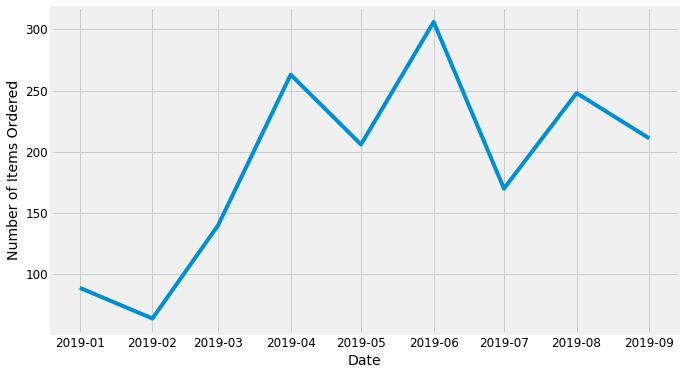

In [57]:
## plot graph
plt.xlabel("Date")
plt.ylabel("Number of Items Ordered")
plt.plot(df_monthly)

In [58]:
#Determine Rolling Statistics to check the stationarity by calculating the mean
rolmean = df_monthly.rolling(window=2).mean()

rolstd = df_monthly.rolling(window=2).std()
print(rolmean,rolstd)

            Order Item
Created On            
2019-01-01         NaN
2019-02-01        76.5
2019-03-01       102.0
2019-04-01       201.5
2019-05-01       234.5
2019-06-01       256.0
2019-07-01       238.0
2019-08-01       209.0
2019-09-01       229.5             Order Item
Created On            
2019-01-01         NaN
2019-02-01   17.677670
2019-03-01   53.740115
2019-04-01   86.974134
2019-05-01   40.305087
2019-06-01   70.710678
2019-07-01   96.166522
2019-08-01   55.154329
2019-09-01   26.162951


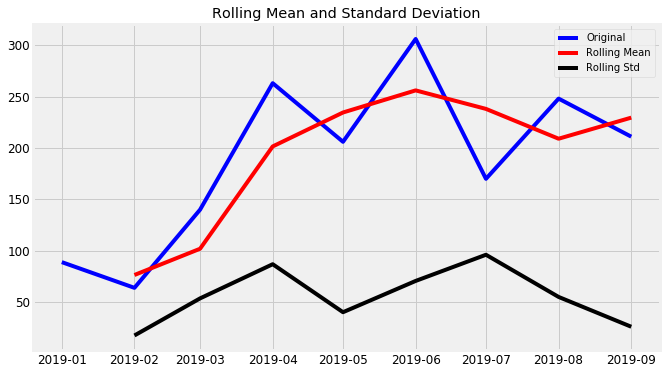

In [59]:
#Plot Rolling Statistics
orig = plt.plot(df_monthly, color = 'blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [60]:
#Lets us perform ADFuller test as well
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest= adfuller(df_monthly['Order Item'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-Value','#Lags Used','No. Of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s) %key'] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics            -1.999131
p-Value                     0.286954
#Lags Used                  0.000000
No. Of Observations Used    8.000000
Critical Value (%s) %key   -2.802961
dtype: float64


In [61]:
#p-value is much less than 0.5 and we can say that data is stationary already.

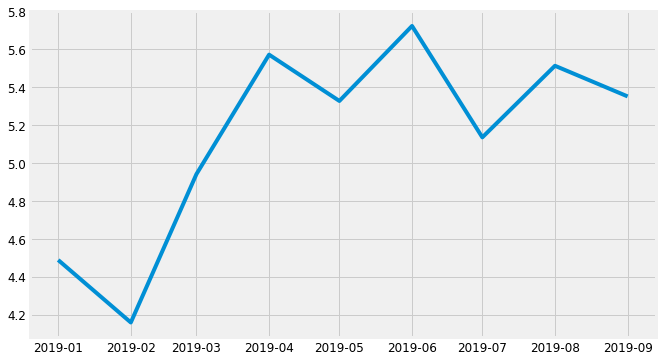

In [62]:
#Estimate Trend
df_monthly_logscale = np.log(df_monthly)
plt.plot(df_monthly_logscale)

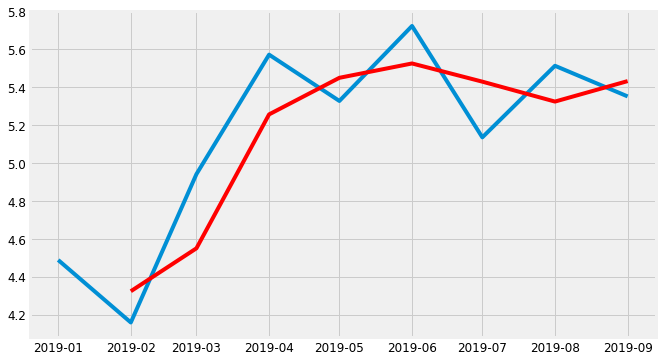

In [63]:
movingAverage = df_monthly_logscale.rolling(window=2).mean()
movingSTD = df_monthly_logscale.rolling(window=2).std()
plt.plot(df_monthly_logscale)
plt.plot(movingAverage,color='red')

In [64]:
dflogScaleMinusMovingAverage = df_monthly_logscale - movingAverage
#print(dflogScaleMinusMovingAverage)

#Remove Nan values
dflogScaleMinusMovingAverage.dropna(inplace=True)
dflogScaleMinusMovingAverage

,Order Item
Created On,
2019-02-01,-0.164877
2019-03-01,0.391380
2019-04-01,0.315256
2019-05-01,-0.122139
2019-06-01,0.197854
2019-07-01,-0.293893
2019-08-01,0.188815
2019-09-01,-0.080785


In [65]:
def test_stationarity(timeseries):
    
    #Determine Rolling Statistics
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = 'blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest= adfuller(timeseries['Order Item'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-Value','#Lags Used','No. Of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s) %key'] = value
    
    print(dfoutput)


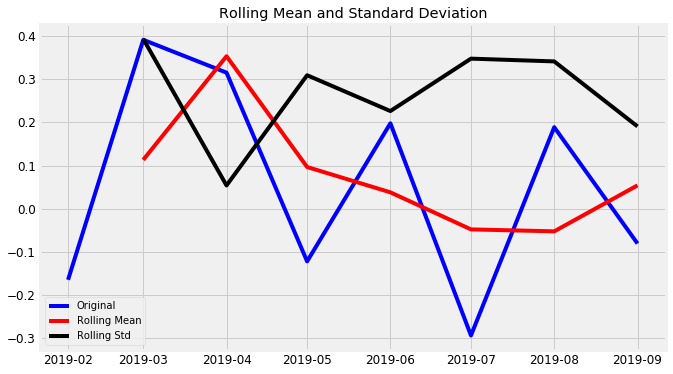

Results of Dickey-Fuller Test:
Test Statistics            -3.692744
p-Value                     0.004216
#Lags Used                  0.000000
No. Of Observations Used    7.000000
Critical Value (%s) %key   -2.843868
dtype: float64


In [66]:
test_stationarity(dflogScaleMinusMovingAverage)

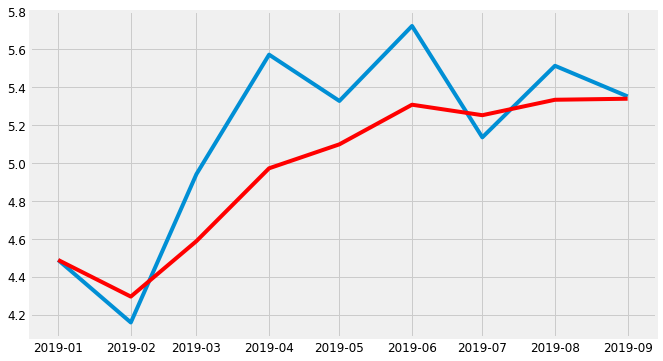

In [67]:
#To determine the trend in the timeseries
exponentialDecayWeightedAverage  = df_monthly_logscale.ewm(halflife=2, min_periods=0, adjust=True).mean()
plt.plot(df_monthly_logscale)
plt.plot(exponentialDecayWeightedAverage , color='red')

In [68]:
#There is no continuous upward or downward trend. Its alternative trend with respect to time.

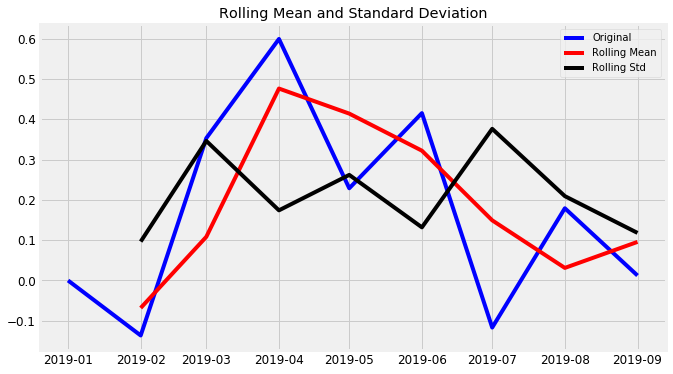

Results of Dickey-Fuller Test:
Test Statistics            -2.282813
p-Value                     0.177571
#Lags Used                  0.000000
No. Of Observations Used    8.000000
Critical Value (%s) %key   -2.802961
dtype: float64


In [69]:
#Another Transformation of data
df_logscale_minus_movingAvgofExpDecayAvg = df_monthly_logscale - exponentialDecayWeightedAverage
test_stationarity(df_logscale_minus_movingAvgofExpDecayAvg)

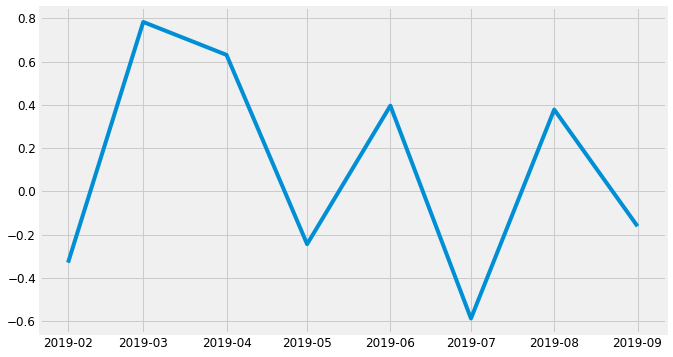

In [70]:
df_Log_Diff_Shift = df_monthly_logscale - df_monthly_logscale.shift()
plt.plot(df_Log_Diff_Shift)

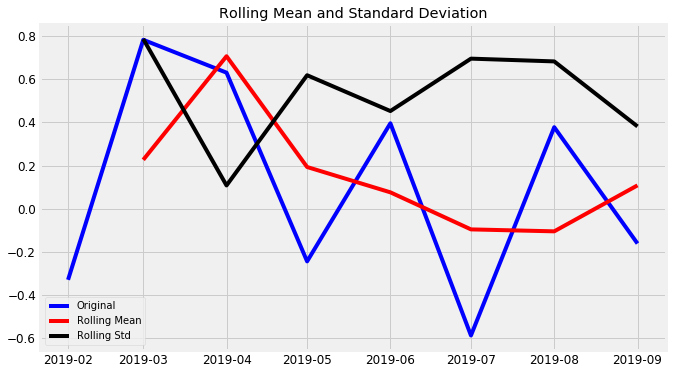

Results of Dickey-Fuller Test:
Test Statistics            -3.692744
p-Value                     0.004216
#Lags Used                  0.000000
No. Of Observations Used    7.000000
Critical Value (%s) %key   -2.843868
dtype: float64


In [71]:
df_Log_Diff_Shift.dropna(inplace=True)
test_stationarity(df_Log_Diff_Shift)

In [74]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_Log_Diff_Shift, nlags=20)
lag_pacf = pacf(df_Log_Diff_Shift, nlags=2, method='ols')

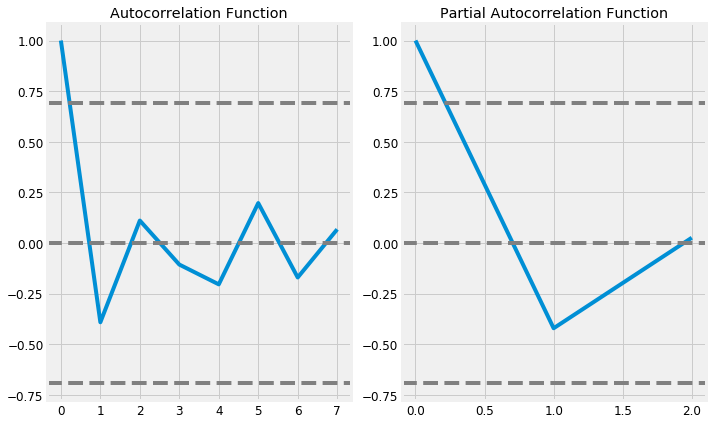

In [75]:
#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df_Log_Diff_Shift)),linestyle="--",color='grey')
plt.axhline(y=1.96/np.sqrt(len(df_Log_Diff_Shift)),linestyle="--",color='grey')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df_Log_Diff_Shift)),linestyle="--",color='grey')
plt.axhline(y=1.96/np.sqrt(len(df_Log_Diff_Shift)),linestyle="--",color='grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [75]:
#Get p and q values from PACF and ACF respectively
#p = 1.2
#q = 1.1

Plotting AR Model


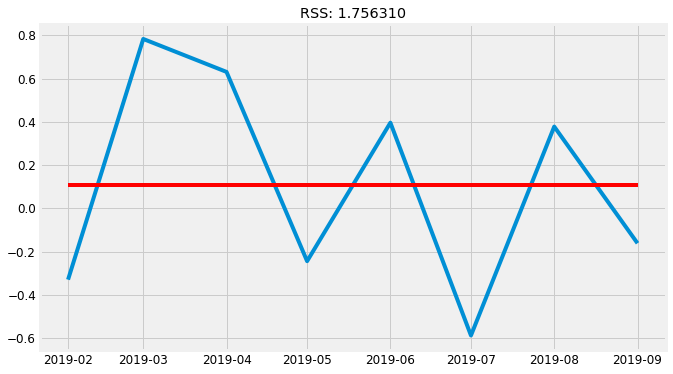

In [81]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(df_monthly_logscale, order=(0,1,0))
results_AR = model.fit(disp=-1)
plt.plot(df_Log_Diff_Shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'%sum((results_AR.fittedvalues-df_Log_Diff_Shift['Order Item'])**2))
print("Plotting AR Model")

Plotting MA Model


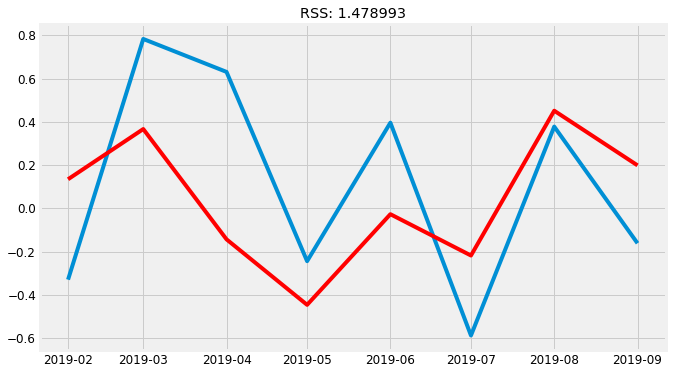

In [78]:
#MA Model
model = ARIMA(df_monthly_logscale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(df_Log_Diff_Shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'%sum((results_MA.fittedvalues-df_Log_Diff_Shift['Order Item'])**2))
print("Plotting MA Model")

Plotting ARIMA Model


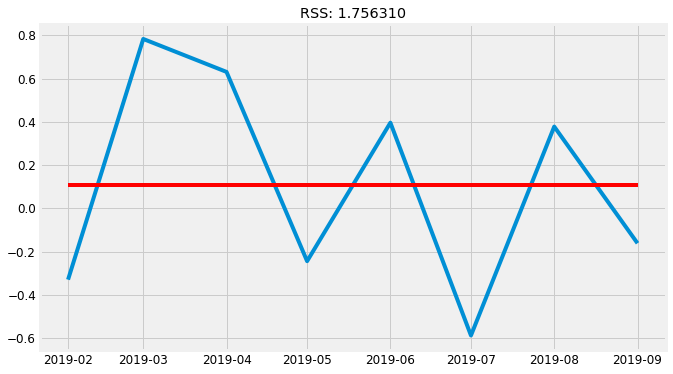

In [83]:

model = ARIMA(df_monthly_logscale, order=(0,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(df_Log_Diff_Shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'%sum((results_ARIMA.fittedvalues-df_Log_Diff_Shift['Order Item'])**2))
print("Plotting ARIMA Model")

In [84]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Created On
2019-02-01    0.107903
2019-03-01    0.107903
2019-04-01    0.107903
2019-05-01    0.107903
2019-06-01    0.107903
2019-07-01    0.107903
2019-08-01    0.107903
2019-09-01    0.107903
Freq: MS, dtype: float64


In [85]:
#Convert to Cumulative Sum
predictions_ARIMA_diff_cumsum = pd.Series(predictions_ARIMA_diff.cumsum())
print(predictions_ARIMA_diff_cumsum)

Created On
2019-02-01    0.107903
2019-03-01    0.215805
2019-04-01    0.323708
2019-05-01    0.431611
2019-06-01    0.539514
2019-07-01    0.647416
2019-08-01    0.755319
2019-09-01    0.863222
Freq: MS, dtype: float64


In [86]:
predictions_ARIMA_log = pd.Series(df_monthly_logscale['Order Item'].ix[0], index = df_monthly_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Created On
2019-01-01    4.488636
2019-02-01    4.596539
2019-03-01    4.704442
2019-04-01    4.812345
2019-05-01    4.920247
2019-06-01    5.028150
2019-07-01    5.136053
2019-08-01    5.243955
2019-09-01    5.351858
Freq: MS, dtype: float64

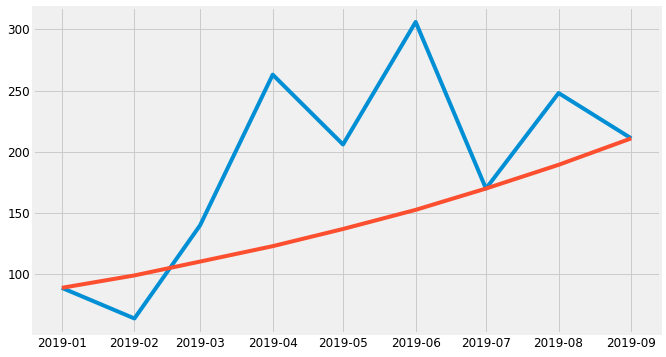

In [87]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_monthly)
plt.plot(predictions_ARIMA)

In [88]:
df_monthly_logscale

,Order Item
Created On,
2019-01-01,4.488636
2019-02-01,4.158883
2019-03-01,4.941642
2019-04-01,5.572154
2019-05-01,5.327876
2019-06-01,5.723585
2019-07-01,5.135798
2019-08-01,5.513429
2019-09-01,5.351858


In [89]:
df_monthly_logscale.shape

(9, 1)

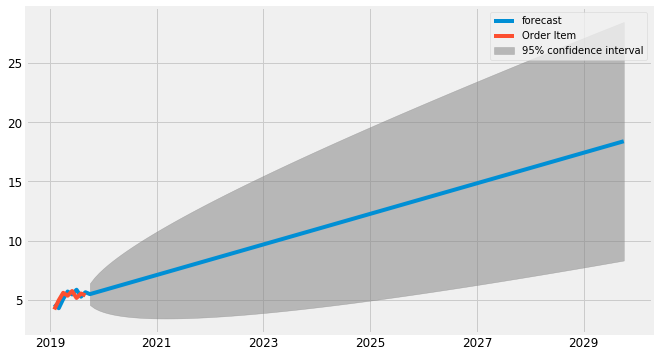

In [90]:
results_ARIMA.plot_predict(1,129)
x = results_ARIMA.forecast(steps=120)

## AUTO ARIMA MODEL

In [87]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [89]:
model = pm.auto_arima(df_monthly_logscale, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=0.092, BIC=-0.125, Fit time=0.107 seconds
Fit ARIMA: order=(0, 2, 0); AIC=-2.694, BIC=-2.802, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=-1.015, BIC=-1.177, Fit time=0.050 seconds
Fit ARIMA: order=(0, 2, 1); AIC=-1.085, BIC=-1.247, Fit time=0.045 seconds
Total fit time: 0.220 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                    7
Model:                 ARIMA(0, 2, 0)   Log Likelihood                   3.347
Method:                           css   S.D. of innovations              0.150
Date:                Thu, 26 Sep 2019   AIC                             -2.694
Time:                        20:57:03   BIC                             -2.802
Sample:                             2   HQIC                            -4.031
                                                                              
                 coef    std err       

ValueError: operands could not be broadcast together with shapes (9,) (5,) (9,) 

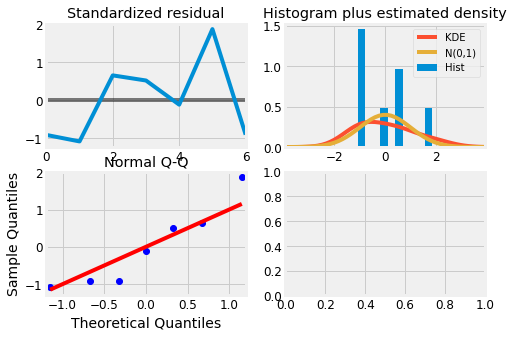

In [90]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [94]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df_monthly_logscale), len(df_monthly_logscale)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

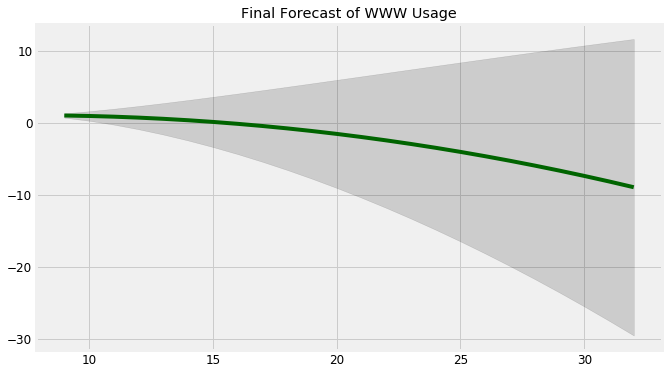

In [101]:
# Plot
#plt.plot(df_monthly_logscale.index)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

# By Maintaning the Individual history, We can do some Recommendation Systems using Machine Learning

### Most Recommended, Most Liked by, Famous nearby, Cusines and dishes of your interest, Discounts, Top Cuisines, Top Rated, Top Brands around you, Offers you might like, Hygine Rated, Great Offers, Newly Opened, Exclusivly For you..
